# Give Me Some Credits

# 6 - Results Exploration #2

* Calculs sur la Matrice de gain

In [12]:
from bigml.api import BigML
from pandas import read_csv
df = read_csv('BatchPrediction/GMSC_Prediction_Ensemble.csv')

%store -r TP
%store -r TN
%store -r FP
%store -r FN

In [13]:
#AVEC SEUIL = 0.5
gain = (TP * 0) + (TN * 500) - (FP * 500) - (FN * 2500)
print("Vous avez empoché:", gain,"$")

Vous avez empoché: 9547000 $


* Création de la fonction optimisant le seuil pour une meilleure matrice de gain

In [14]:
def cost_threshold(seuil):
    prediction_threshold = df['1 probability'] > seuil

    #~ = "not" pour les tableaux / & = "and" pour les tableaux / | = "or" pour les tableaux

    P_pred = prediction_threshold
    N_pred = ~prediction_threshold

    P_real = (df['SeriousDlqin2yrs'] == 1)
    N_real = (df['SeriousDlqin2yrs'] == 0)

    TP = len(df.loc[P_pred & P_real])
    TN = len(df.loc[N_pred & N_real])
    FP = len(df.loc[P_pred & N_real])
    FN = len(df.loc[N_pred & P_real])

    TP_cost = 0
    FN_cost = -2500
    FP_cost = -500
    TN_cost = 500

    cost = TP * TP_cost
    cost += TN * TN_cost
    cost += FP * FP_cost
    cost += FN * FN_cost
    return cost

* Visualisation du seuil optimal en 1000 intervalles entre 0 et 1.

Le gain maximum est 9972000 et il est obtenu avec un seuil de 0.093


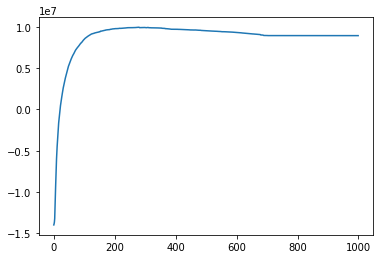

In [15]:
import matplotlib.pyplot as plt

table = [cost_threshold(n/1000) for n in range(0,1000)]
plt.plot(table)

max_val = max(table)
max_threshold = table.index(max_val)/3000
print(f'Le gain maximum est {max_val} et il est obtenu avec un seuil de {max_threshold}')

* Calcul de l'AUC sur le modèle ensemble

In [16]:
ln1=df['SeriousDlqin2yrs'].sum(axis =0)
print(ln1)
df1 = df['1 probability'] * df['SeriousDlqin2yrs']

df0 = df['SeriousDlqin2yrs'] + 1
df0 = df0.apply(lambda x: 0 if x == 2 else 1)
ln2=df0.sum(axis =0)
print(ln2)
df0 = df['1 probability'] * df0


nb1=0
for r1 in df1:
    if r1 > 0:
        for r2 in df0:
            if r1 > r2 and r2!=0:
                nb1 = nb1 + 1
print(nb1)
print("AUC= ", nb1/(ln1*ln2))

2015
27985
48209231
AUC=  0.8549285929940312
